# California Housing Prices

[Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

[Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2022/03-classification/homework.md)

wget-link: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


## Download Data

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-18 08:52:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.76MB/s    in 0.8s    

2023-09-18 08:52:25 (1.76 MB/s) - ‘housing.csv’ saved [1423529/1423529]



## Read Data

In [1]:
import pandas as pd
df_orig = pd.read_csv('housing.csv')

## Data preparation

* Select only the features from above and fill in the missing values with median.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
* Create a new column `population_per_household` by dividing the column `population` by the column households from dataframe.

In [2]:
selected_features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                     'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [3]:
df = df_orig[selected_features]

In [4]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
total_bedrooms_median = df['total_bedrooms'].median()

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(value=total_bedrooms_median)

In [8]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.

In [9]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [10]:
df['rooms_per_household'][:5]

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
Name: rooms_per_household, dtype: float64

### Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.

In [11]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [12]:
df['bedrooms_per_room'][:5]

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: bedrooms_per_room, dtype: float64

### Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [13]:
df['population_per_household'] = df['population'] / df['households']

In [14]:
df['population_per_household'][:5]

0    2.555556
1    2.109842
2    2.802260
3    2.547945
4    2.181467
Name: population_per_household, dtype: float64

In [15]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:

* [ ] NEAR BAY
* [x] <1H OCEAN
* [ ] INLAND
* [ ] NEAR OCEAN

In [16]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Question 2
* Create the `correlation matrix` for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* [x] `total_bedrooms` and `households` ------->>>> `Ans` correlation index is .97
* [ ] `total_bedrooms` and `total_rooms`
* [ ] `population` and `households`
* [ ] `population_per_household` and `total_rooms`

### Extract features and labels

In [17]:
# y = df['median_house_value']
# del df['median_house_value']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  20640 non-null  float64
 1   longitude                 20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [19]:
numerical_features = df.columns[df.dtypes != 'object']
numerical_features

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [20]:
categorical_features = df.columns[df.dtypes == 'object']
categorical_features

Index(['ocean_proximity'], dtype='object')

In [21]:
df[numerical_features].head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [22]:
df[numerical_features].corrwith(df['median_house_value']).abs()

latitude                    0.144160
longitude                   0.045967
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049457
population                  0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room           0.233303
population_per_household    0.023737
dtype: float64

In [23]:
df[numerical_features].corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.098619,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.081205,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.135622,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187381,-0.024581
total_bedrooms,-0.066484,0.069120,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.001765,0.071649,-0.028325
population,-0.108785,0.099773,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.010035,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.080598,0.034498,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.326895,-0.545298,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.233303,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.370308,-0.004852


<function matplotlib.pyplot.show(close=None, block=None)>

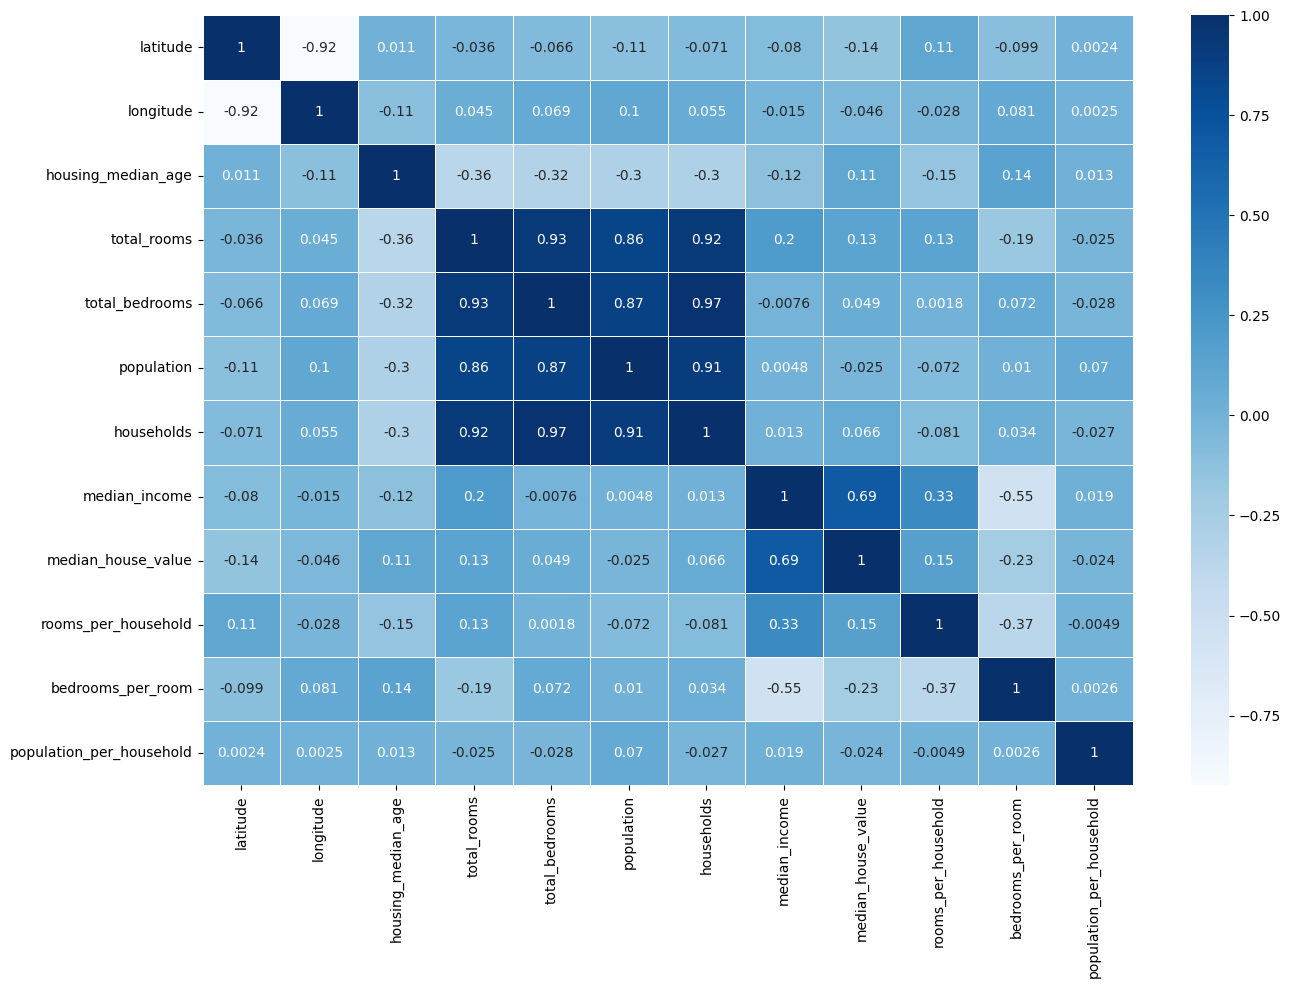

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Inspecting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, linewidth=.5, cmap='Blues')
plt.show

## Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [25]:
median_house_value_mean = df['median_house_value'].mean()
median_house_value_mean

206855.81690891474

In [27]:
df['above_average'] = (df['median_house_value'] > median_house_value_mean).astype(int)

In [42]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


## Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [30]:
from sklearn.model_selection import train_test_split

In [43]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
del df_train['median_house_value']

In [46]:
# y_val = df_val['above_average']

# del df_val['above_average']
del df_val['median_house_value']

In [47]:
# y_test = df_test['above_average']

# del df_test['above_average']
del df_test['median_house_value']

In [48]:
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,36.06,-119.01,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND,4.192201,0.289037,3.877437,0
1,35.14,-119.46,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND,5.039384,0.147808,2.679795,0
2,37.80,-122.44,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.113577,1.360332,1
3,34.28,-118.72,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.142576,3.444444,1
4,36.62,-121.93,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.185028,2.483645,1


## Question 3
Calculate the mutual information score between `above_average` and `ocean_proximity` . Use the training set only.
Round it to 2 decimals using `round(score, 2)`

What is their mutual information score?

Options:

* [ ] 0.26
* [ ] 0
* [x] 0.10
* [ ] 0.16

In [49]:
# Mutual information - concept from information theory, 
# it tells us how much we can learn about one variable if we know the value of another

from sklearn.metrics import mutual_info_score

In [50]:
round(mutual_info_score(df_train.above_average, df_train.ocean_proximity), 2)

0.1

## Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* [ ] 0.60
* [ ] 0.72
* [x] 0.84
* [ ] 0.95

### One-hot encoding

* Use Scikit-Learn to encode categorical features

In [53]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [54]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [112]:


train_dict = df_train.to_dict(orient='records')

In [113]:
X_train = dv.fit_transform(train_dict)

In [114]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [115]:
X_train[:2]

array([[ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,
         3.44300000e+01, -1.19670000e+02,  2.36810000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
         3.75401070e+00,  3.92245989e+00,  3.81000000e+02,
         1.46700000e+03],
       [ 1.30227981e-01,  8.06000000e+02,  2.40000000e+01,
         3.37400000e+01, -1.18320000e+02,  1.01357000e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  2.24800000e+03,
         2.78908189e+00,  7.56451613e+00,  7.94000000e+02,
         6.09700000e+03]])

In [116]:
y_train.values

array([1, 1, 0, ..., 1, 0, 0])

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [118]:
model.fit(X_train, y_train.values)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [119]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_val_predict = model.predict(X_val)

In [120]:
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
y_val_predict

array([0, 0, 1, ..., 1, 1, 0])

In [121]:
y_val.values

array([0, 0, 1, ..., 1, 1, 0])

In [122]:
y_val_predict == y_val.values

array([ True,  True,  True, ...,  True,  True,  True])

In [123]:
(y_val_predict == y_val.values).sum()

3454

In [124]:
len(y_val_predict)

4128

In [125]:
(y_val_predict == y_val.values).mean()

0.8367248062015504

In [126]:
(y_val_predict == y_val.values).sum() / len(y_val_predict)

0.8367248062015504

In [127]:
acc_actual = (y_val_predict == y_val.values).sum() / len(y_val_predict)

In [128]:
acc_actual

0.8367248062015504

In [129]:
# acc_actual = 0.84

## Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * [x] `total_rooms`
    * [ ] `total_bedrooms`
    * [ ] `population`
    * [ ] `households`

Note: the difference doesn't have to be positive

In [132]:
def get_accuracy(feature_name):
    # Copy data frame     
    df_train_5 = df_train.copy()
    df_val_5 = df_val.copy()
    df_test_5 = df_test.copy()
    
    # Delete Feature
    del df_train_5[feature_name]
    
    # Convert categorical feature with one hot encoding
    train_dict = df_train_5.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    # Re-train model with new dataset
    model.fit(X_train, y_train.values)
    
    # Prepare validation dataset
    del df_val_5[feature_name]
    val_dict = df_val_5.to_dict(orient='records')
    X_val = dv.fit_transform(val_dict)
    
    # Get Prediction
    y_val_predict = model.predict(X_val)
    
    # Get accuracy
    acc = (y_val_predict == y_val.values).sum() / len(y_val_predict)
    
    return acc

In [133]:
acc_total_rooms = get_accuracy('total_rooms')
acc_total_bedrooms = get_accuracy('total_bedrooms')
acc_population = get_accuracy('population')
acc_households = get_accuracy('households')

In [136]:
diff_total_rooms = acc_actual - acc_total_rooms
diff_total_bedrooms = acc_actual - acc_total_bedrooms
diff_population = acc_actual - acc_population
diff_households = acc_actual - acc_households

In [140]:
diff_total_rooms, diff_total_bedrooms, diff_population, diff_households

(0.00024224806201555982,
 -0.0002422480620154488,
 0.01041666666666674,
 0.0029069767441860517)

In [141]:
import numpy as np
np.array([diff_total_rooms, diff_population, diff_households]).min()

0.00024224806201555982

In [143]:
[diff_total_rooms, diff_population, diff_households]

[0.00024224806201555982, 0.01041666666666674, 0.0029069767441860517]

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `median_house_value`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:

* [x] 0
* [ ] 0.01
* [ ] 0.1
* [ ] 1
* [ ] 10

### Apply the logarithmic transformation to `median_house_value`

In [144]:
#@ NORMALIZING THE DATA:
df['median_house_value']=np.log1p(df['median_house_value'])

In [145]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [146]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [148]:
y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

In [149]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [161]:
alpha = [0, 0.01, 0.1, 1, 10]
# alpha = [0]

In [162]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [163]:
from sklearn.linear_model import Ridge
rmse_list = []
for a in alpha:
    print(a)
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train.values)

    y_val_predict = model.predict(X_val)
    acc = rmse(y_val.values, y_val_predict)
    rmse_list.append(acc)
    

0


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


10


/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [167]:
for acc in rmse_list:
    print(round(acc, 3))
    

0.523
0.523
0.523
0.523
0.523
